# More Examples

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Pandas

* Line chart (line, default)
* Scatter plots (scatter)
* Histograms (hist) & boxplots (box)
* Column (bar) and bar (barh) charts

In [2]:
n = 100
x = np.random.randn(n)
y = np.random.randn(n)

In [3]:
# Assemble data into DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.145380,-0.718746
1,-2.095327,0.769003
2,-0.961127,-0.999622
3,-0.493570,-0.879264
4,0.778863,0.508460


There are two methods for creating visualizations using the .plot method:

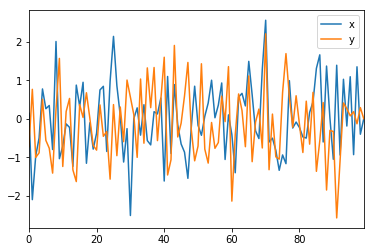

In [4]:
# kind argument
df.plot(kind='line');

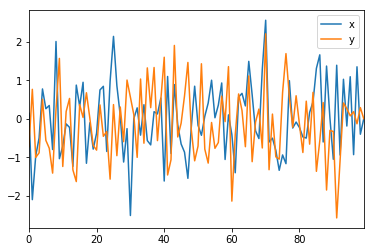

In [5]:
# plot function
df.plot.line();

Note that the name of the plot passed to the **kind** argument and the name of the function match in all cases.

The .plot method includes arguments for many of the same formatting and labeling tasks that we performed in matplotlib. Either approach can be applied to format and label your visualization.

* Figure formatting and layout: figsize, subplots/layout, sharex/y, title, legend
* Axes formatting: x/yticks, log scaling (logx/y, loglog), x/ylim, grid, rot
* Plot styling: matplotlib arguments such as color, marker, linestyle, linewidth (if applicable)

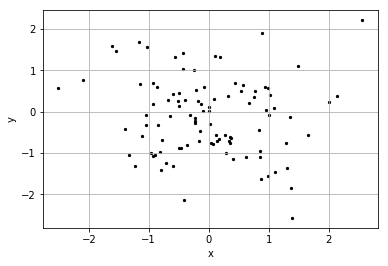

In [6]:
df.plot(kind='scatter', x='x', y='y', color='k', marker='.', grid=True);

Let's reload our tips data:

In [8]:
path = ''
tips = pd.read_csv(path + 'tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Similar to before, let's calculate the tip_pct to facilitate our analysis:

In [9]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips['tip_pct'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_pct, dtype: float64

Let's visualize the distribution of tip_pct:

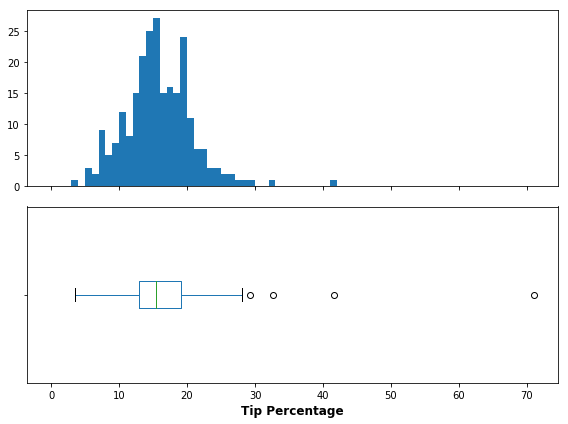

In [10]:
# Create figure with suplots
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,6))

# Histogram
tips['tip_pct'].plot.hist(bins=np.arange(tips['tip_pct'].max()), ax=ax[0])

# Boxplot
tips['tip_pct'].plot.box(vert=False, ax=ax[1])

# Adjust figure labels
ax[0].set_ylabel('')
ax[1].set_yticklabels('')
ax[1].set_xlabel('Tip Percentage', fontweight='bold', fontsize=12);

# Adjust subplot
plt.tight_layout()

In addition to the standard boxplot functionality in pandas, there is an additional boxplot method of Data Frames, which facilitates more flexible data visualization using boxplots.

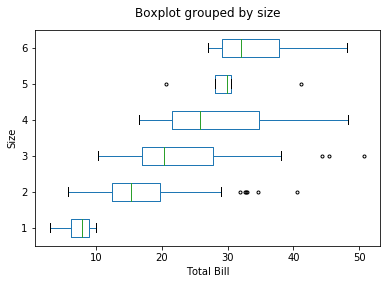

In [11]:
# GroupBy + Boxplots
tips.boxplot(column='total_bill', by='size', flierprops={'marker': '.'}, vert=False, grid=False)
plt.xlabel('Total Bill')
plt.ylabel('Size')
plt.title('');

Bar/column charts are one of the most natural visualizations to apply to analysis involving DataFrames, as we often perform descriptive analysis involving categorical variables.

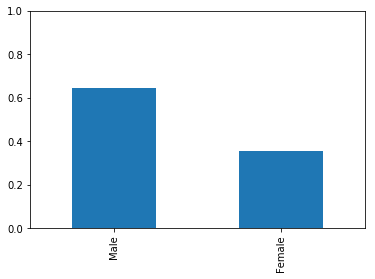

In [12]:
# Who's paying?
tips['sex'].value_counts(normalize=True).plot(kind='bar')
plt.ylim([0,1]);

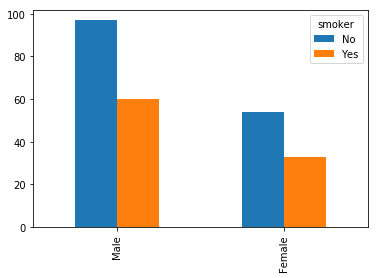

In [13]:
# Who's smoking? - Stacked
pd.crosstab(index=tips.sex, columns=tips.smoker).loc[['Male','Female']].plot(kind='bar')
plt.xlabel('');

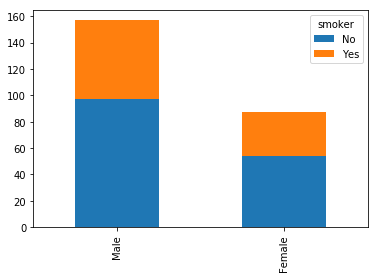

In [14]:
# Who's smoking? - Stacked
pd.crosstab(index=tips.sex, columns=tips.smoker).loc[['Male','Female']].plot(kind='bar', stacked=True)
plt.xlabel('');

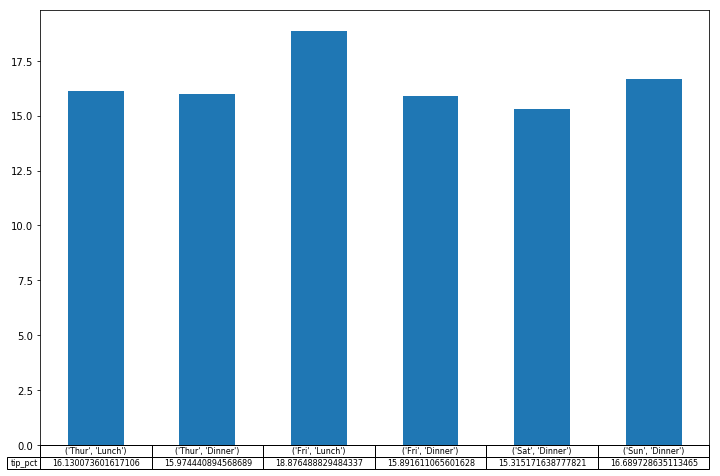

In [15]:
# Summarize tip_pct by day of the week
order = [('Thur','Lunch'),('Thur','Dinner'),('Fri','Lunch'),('Fri','Dinner'),('Sat','Dinner'),('Sun','Dinner')]
tips.groupby(by=['day','time'])['tip_pct'].mean().loc[order].plot(kind='bar', figsize=(12,8), table=True)
plt.xticks([])
plt.xlabel('');

## Seaborn

* Fundamental: Bar/column charts, histograms/boxplots
* New visualizations: Point plots, violin plots, rug/strip plots, heatmaps

### Controlling Aesthetics

Similar to the matplotlib functionality for styling visualizations (plt.style), Seaborn also offers the ability to configure styling easily, via the sns.set_style function. Specifically, there are five available themes:

* white, whitegrid, ticks - White background with or without grid and/or ticks
* dark, darkgrid (default) - Gray background with or without grid

This styling applies to visualizations created using Seaborn functionality, but also matplotlib and pandas.

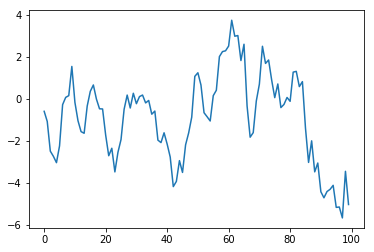

In [16]:
n = 100
s = np.arange(n)
x = np.random.randn(n).cumsum()
plt.plot(s, x);

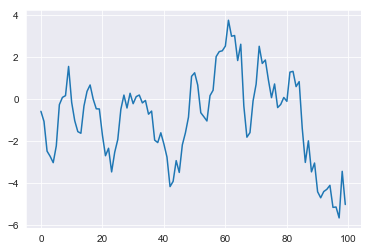

In [17]:
sns.set_style('darkgrid')
plt.plot(s, x);

In [18]:
# Set style to whitegrid
sns.set_style('white')

Seaborn also allows you to control the presence/absence of axes spines, with the sns.despine function. The primary reason for controlling these elements is related to the efficiency of our visualization. If a particular spine does not contribute in a meaningful way to the visualization, then perhaps it can be removed.

In [19]:
# Generate 5 samples of size n from the standard normal distribution
x = np.random.randn(n,5)

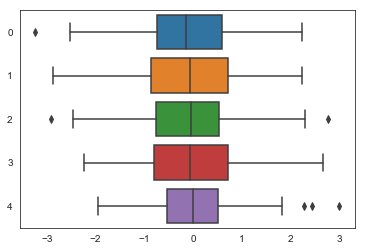

In [20]:
# Default boxplot styling
sns.boxplot(data=x, orient='h');

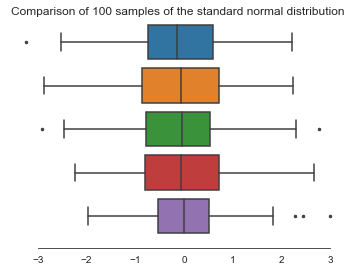

In [21]:
# Despined boxplot
sns.boxplot(data=x, orient='h', flierprops={'marker': '.'})
sns.despine(left=True, top=True, right=True, trim=True, offset=10)
plt.yticks([]);
plt.title('Comparison of %d samples of the standard normal distribution' % n);

### Available Colormaps

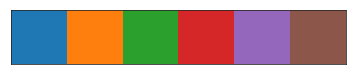

In [22]:
# Default colormap
current_palette = sns.color_palette(n_colors=6)
sns.palplot(current_palette)

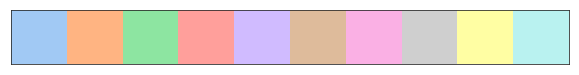

In [23]:
# Variations on the default theme - deep, muted, pastel, bright, dark, colorblind
sns.palplot(sns.color_palette('pastel'))

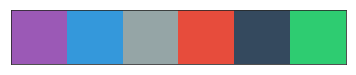

In [24]:
# Hex codes
hex_colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(hex_colors)

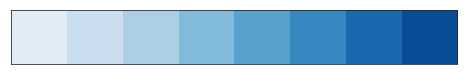

In [25]:
# Sequential colormap - see matplotlib and ColorBrewer2
sns.palplot(sns.color_palette("Blues", 8))

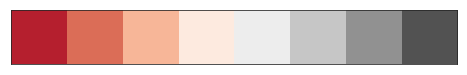

In [26]:
# Diverging colormap - see matplotlib and ColorBrewer2
sns.palplot(sns.color_palette("RdGy", 8))

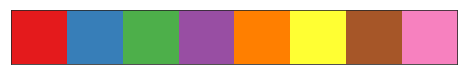

In [27]:
# Qualitative colormap - see matplotlib and ColorBrewer
sns.palplot(sns.color_palette("Set1", 8))

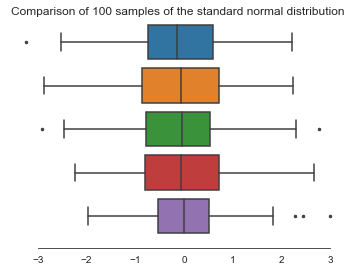

In [28]:
# Colormap for multiple boxplots - Specify using palette argument
sns.boxplot(data=x, orient='h', flierprops={'marker': '.'})
sns.despine(left=True, top=True, right=True, trim=True, offset=10)
plt.yticks([]);
plt.title('Comparison of %d samples of the standard normal distribution' % n);